# Digit Recognition

 1. Screen Capture
 2. Generate dataset and load it
 3. Fit the model using SVC and calculate accuracy
 4. Prediction of image drawn in paint

In [2]:
import pyscreenshot as ImageGrab
import time 

In [12]:
images = "Captured_Images/1/"
for i in range(40):
    time.sleep(3)
    im = ImageGrab.grab(bbox=(70,230,900,900))
    print("saved..." , i)
    im.save(images + str(i) + '.png')
    print("clear screen now and redraw now...")

saved... 0
clear screen now and redraw now...
saved... 1
clear screen now and redraw now...
saved... 2
clear screen now and redraw now...
saved... 3
clear screen now and redraw now...
saved... 4
clear screen now and redraw now...
saved... 5
clear screen now and redraw now...
saved... 6
clear screen now and redraw now...
saved... 7
clear screen now and redraw now...
saved... 8
clear screen now and redraw now...
saved... 9
clear screen now and redraw now...
saved... 10
clear screen now and redraw now...
saved... 11
clear screen now and redraw now...
saved... 12
clear screen now and redraw now...
saved... 13
clear screen now and redraw now...
saved... 14
clear screen now and redraw now...
saved... 15
clear screen now and redraw now...
saved... 16
clear screen now and redraw now...
saved... 17
clear screen now and redraw now...
saved... 18
clear screen now and redraw now...
saved... 19
clear screen now and redraw now...
saved... 20
clear screen now and redraw now...
saved... 21
clear scree

# 1.Screen Capture


In [63]:
def one_time():
    import pyscreenshot as ImageGrab
    import time 
    images = "Captured_Images/0/"
    for i in range(40):
        time.sleep(8)
        im = ImageGrab.grab(bbox=(70,230,900,900))
        print("saved..." , i)
        im.save(images + str(i) + '.png')
        print("clear screen now and redraw now...")

# Generate Dataset

In [16]:
import cv2
import csv
import glob

header = ["label"]
for i in range(784):
    header.append("pixel" +str(i))
with open('dataset.csv', 'a') as f:
    writer = csv.writer(f)
    writer.writerow(header)
for label in range(10):
    dirlist = glob.glob("Captured_Images/" +str(label)+"/*.png")
    
    for img_path in dirlist:
        im = cv2.imread(img_path)
        im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
        im_gray = cv2.GaussianBlur(im_gray, (15,15), 0)
        roi = cv2.resize(im_gray, (28,28), interpolation = cv2.INTER_AREA)
        
        data = []
        data.append(label)
        rows, cols = roi.shape
        
        for i in range(rows):
            for j in range(cols):
                k = roi[i,j]
                if k>5:
                    k = 1
                else:
                    k = 0
                data.append(k)
        with open('dataset.csv', 'a') as f:
            writer = csv.writer(f)
            writer.writerow(data)  

# Load the dataset

In [17]:
import pandas as pd
from sklearn.utils import shuffle
data = pd.read_csv('dataset.csv')
data = shuffle(data)
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
321,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
333,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
343,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
337,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
171,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
391,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Seperation of dependent and independent Variable

In [18]:
X = data.drop(["label"], axis = 1)
Y = data["label"]

# Preview of one image using matplotlib

1


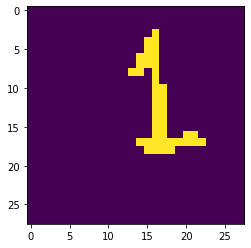

In [20]:
import matplotlib.pyplot as plt
import cv2
idx = 70
img = X.loc[idx].values.reshape(28,28)
print(Y[idx])
plt.imshow(img)

# Train-test split

In [21]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,Y, test_size = 0.2)

# Fit the model using svc and also to ave the model using joblib

In [23]:
import joblib
from sklearn.svm import SVC
classifier = SVC(kernel = "linear" , random_state = 6)
classifier.fit(train_x,train_y)
joblib.dump(classifier, "model/digit_recognizer")

['model/digit_recognizer']

# Calculate Accuracy

In [25]:
from sklearn import metrics
prediction = classifier.predict(test_x)
print("Accuracy = ", metrics.accuracy_score(prediction, test_y))

Accuracy =  0.75


# prediction of image drawn in paint

In [27]:
import joblib
import cv2
import numpy as np
import time
import pyscreenshot as ImageGrab

model = joblib.load("model/digit_recognizer")
images_folder = "img/"

while True:
    img = ImageGrab.grab(bbox=(70,230,900,900))
    
    img.save(images_folder +"img.png")
    im = cv2.imread(images_folder +"img.png")
    im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    im_gray = cv2.GaussianBlur(im_gray, (15,15), 0)
    
    #Threshold the image
    ret, im_th = cv2.threshold(im_gray, 100, 255, cv2.THRESH_BINARY)
    roi = cv2.resize(im_th, (28,28), interpolation = cv2. INTER_AREA)
        

    rows, cols = roi.shape
    X = []  
    for i in range(rows):
        for j in range(cols):
            k = roi[i,j]
            if k>5:
                k = 1
            else:
                k = 0
            X.append(k)
            
    predictions = model.predict([X])
    predictions = model.predict([X])
    print("Prediction: ", predictions[0])
    cv2.putText(im, "Prediction is: " +str(predictions[0]), (20,20), 0, 0.8, (0,255,0),2,cv2.LINE_AA)
    
    cv2.startWindowThread()
    cv2.namedWindow("Result")
    cv2.imshow("Result", im)
    cv2.waitKey(10000)
    if cv2.waitKey(1)==13:
        break
cv2.destroyAllWindows()

Prediction:  1
Prediction:  0
Prediction:  1
Prediction:  6
Prediction:  1
Prediction:  1
Prediction:  7
Prediction:  7
Prediction:  1
Prediction:  7
Prediction:  2
Prediction:  3
Prediction:  2
Prediction:  2
Prediction:  3
Prediction:  4
Prediction:  4
Prediction:  4
Prediction:  4
Prediction:  4
Prediction:  4
Prediction:  4
Prediction:  4
Prediction:  4
Prediction:  4
Prediction:  4
Prediction:  4
Prediction:  4
Prediction:  4
Prediction:  4
Prediction:  4
Prediction:  4
Prediction:  4
